In [1]:
from mogreps import make_data_object_name, download_data

import netCDF4
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

In [2]:
data_set = netCDF4.Dataset(
    download_data('mogreps-uk', make_data_object_name('mogreps-uk', 2013, 1, 1, 3, 0, 3)))

File ../data/prods_op_mogreps-uk_20130101_03_00_003.nc already exists.


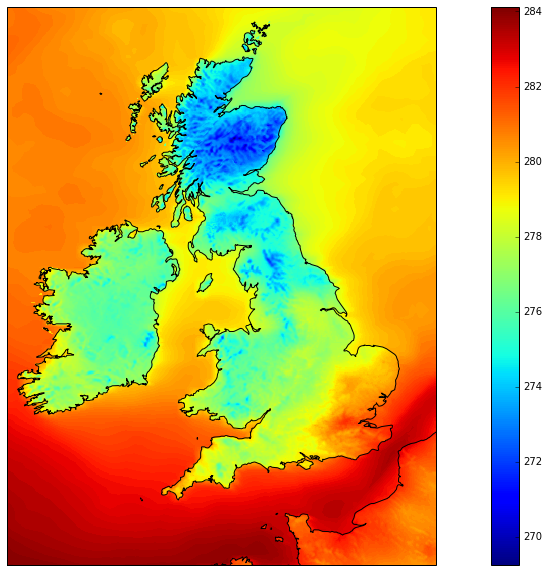

In [3]:
rotation = data_set['rotated_latitude_longitude']
transform=ccrs.RotatedPole(
    pole_longitude=rotation.grid_north_pole_longitude,
    pole_latitude=rotation.grid_north_pole_latitude)
projection=transform

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection=projection)
pcm = ax.pcolormesh(
    data_set['grid_longitude'][:],
    data_set['grid_latitude'][:],
    data_set['air_temperature_2'][0],
    transform=transform)
ax.coastlines(resolution='10m')
fig.colorbar(pcm)

## Listing files in the MOGREPS data bank

In [20]:
import mogreps
bucket = mogreps.s3.Bucket('mogreps-uk')

for x in bucket.objects.filter(Prefix='manifest/2018-04-20'):
    print(x)

s3.ObjectSummary(bucket_name='mogreps-uk', key='manifest/2018-04-20/2a07bbe7-306c-4b10-970b-34e31afc9b47.csv.gz')
s3.ObjectSummary(bucket_name='mogreps-uk', key='manifest/2018-04-20/6c471075-a71d-419e-b70e-ec2581f77817.csv.gz')
s3.ObjectSummary(bucket_name='mogreps-uk', key='manifest/2018-04-20/6f1680c5-1c33-4f81-af02-7b3d7046882c.csv.gz')
s3.ObjectSummary(bucket_name='mogreps-uk', key='manifest/2018-04-20/manifest.json')


## Print some information about NetCDF file

In [34]:
def list_dataset_variables(datasetName):
    """Show description and units of variables in a NetCDF `DataSet`."""
    print("\n\nList of variables:\n")
    print(60*"-")
    for name, variable in datasetName.variables.items():            
        print("variable: {}".format(name))
        for attrname in variable.ncattrs():
            if (attrname == 'long_name'):
                print("    description: {}".format(getattr(variable, attrname)))
            if (attrname == 'units'):
                print("    units      : {}".format(getattr(variable, attrname)))
        print(60*"-")

                
def get_dataset_info(dataset):
    """Show useful information about the NetCDF `DataSet`."""
    for name in dataset.ncattrs():
        print("{:20}: {}".format(name, dataset.getncattr(name)))

    list_dataset_variables(dataset)
    
    
def get_dates(data_set):
    """Obtain `datetime.datetime` objects from the `'time'` axis of a NetCDF `DataSet`."""
    return netCDF4.num2date(data_set['time'][:], data_set['time'].units)

In [35]:
get_dataset_info(data_set)

source              : Data from Met Office Unified Model
um_version          : 7.9
Conventions         : CF-1.5


List of variables:

------------------------------------------------------------
variable: wet_bulb_potential_temperature
    description: wet_bulb_potential_temperature
    units      : K
------------------------------------------------------------
variable: rotated_latitude_longitude
------------------------------------------------------------
variable: time
    units      : hours since 1970-01-01 00:00:00
------------------------------------------------------------
variable: pressure
    units      : hPa
    description: pressure
------------------------------------------------------------
variable: grid_latitude
    units      : degrees
------------------------------------------------------------
variable: grid_longitude
    units      : degrees
------------------------------------------------------------
variable: forecast_period
    units      : hours
----------------